In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

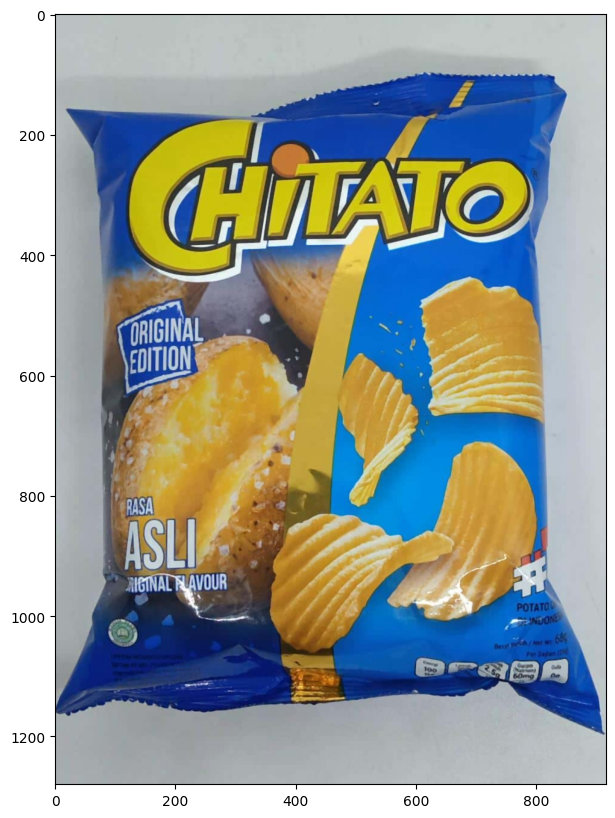

In [ ]:
# import target data
target = cv2.imread('/content/drive/MyDrive/07/target/snacks_target.jpg')
target = cv2.medianBlur(target, 3)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

# target = cv2.equalizeHist(target)
plt.figure(figsize=(10,10))
plt.imshow(target)
plt.show()

In [ ]:
PATH = '/content/drive/MyDrive/07/assets/'
data = []

for img_path in os.listdir(PATH):
  img = cv2.imread(PATH + img_path)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  data.append([img, img_path])

sift = cv2.SIFT_create()

target_kp, target_desc = sift.detectAndCompute(target, None)
target_desc = np.float32(target_desc)

In [ ]:
best_matches = 0
best_matches_data = []

In [ ]:
for index, (img_data, img_path) in enumerate(data):
  img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
  grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  grayscale_img = cv2.medianBlur(grayscale_img, 3)
  grayscale_img = cv2.equalizeHist(grayscale_img)

  img_kp, img_desc = sift.detectAndCompute(grayscale_img, None)
  img_desc = np.float32(img_desc)


  flann = cv2.FlannBasedMatcher(dict(algorithm=1), dict(checks=50))
  matches = flann.knnMatch(target_desc, img_desc, k=2)

  matchesMask = [[0,0] for _ in range(len(matches))]
  current_matches =  0
  for i, (fm, sm) in enumerate(matches):
    if fm.distance < 0.7 * sm.distance:
      matchesMask[i] = [1, 0]
      current_matches +=1
  if current_matches > best_matches:
    best_matches =  current_matches
    best_match_data = {
        'image_data' : img,
        'keypoint' : img_kp,
        'matches' : matches,
        'matches_mask' : matchesMask,
        'descriptor' : img_desc
    }

result = cv2.drawMatchesKnn(
    target,
    target_kp,
    best_match_data['image_data'],
    best_match_data['keypoint'],
    best_match_data['matches'],
    None,
    matchesMask = best_match_data['matches_mask'],
    matchColor = [0,0,200],
    singlePointColor = [0,255,0]
)

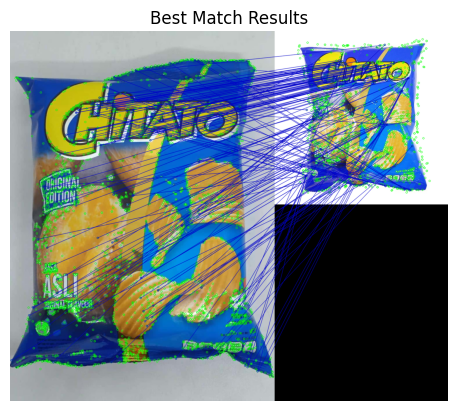

In [ ]:
# result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(result)
plt.title('Best Match Results')
plt.axis('off')
plt.show()